In [1]:
import pandas as pd
import glob
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import shutil

path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
os.chdir(path)
os.getcwd()#os.listdir()

'C:\\Users\\Asus\\Documents\\GitHub\\ANN_Itau'

In [3]:
df = pd.read_csv('Datos/raw/Transaccion_train.csv', index_col=0) #Hacer un acumulativo de montos o trANSSACCIONES
df.Periodo = df.Periodo.astype('object') #Lo pasamos a str
df.id = df.id.astype('object') #Lo pasamos a str

#-.-.-.-.
#Subsetear por periodo:
if (not os.path.exists('./Datos/raw/transaction_subset')):# Crear carpeta ./transaction_subset
    os.mkdir('./Datos/raw/transaction_subset')
else:# Eliminar anteriores para reemplazarlos:
    shutil.rmtree('./Datos/raw/transaction_subset')
    os.mkdir('./Datos/raw/transaction_subset')
data={}
for x in df.Periodo.unique():
    data[f"P_{x}"]=df.loc[(df.Periodo ==x)]
    #print(f"df_Periodo{x}",globals()[f"df_Periodo{x}"].describe())    
    data[f"P_{x}"].to_csv('Datos/raw/transaction_subset/'+f"P_{x}"+'.csv',index=False)

,id,Id_Producto,Tipo,Producto-Tipo,Signo,Monto,Fecha,Periodo
1790315,5795,A,G,A-G,NaN,125916.00,2019-04-25,201904
18036077,59350,G,K,G-K,Negativo,131134.28,NaN,202002
5396559,16740,F,I,F-I,Negativo,120000.00,NaN,201910
5499049,17016,F,H,F-H,Negativo,120000.00,NaN,201906
638513,2116,G,K,G-K,Negativo,121608.86,NaN,202001


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24397537 entries, 0 to 24397536
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   id             int64  
 1   Id_Producto    object 
 2   Tipo           object 
 3   Producto-Tipo  object 
 4   Signo          object 
 5   Monto          float64
 6   Fecha          object 
 7   Periodo        int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 1.6+ GB


None

In [22]:
print( "\t Monto")
display(df['Monto'].describe())
print( "\t Cat")
objec = df.select_dtypes(include=['object'])
display(objec.describe())

	 Monto


count      24397537.00
mean         207511.62
std        11673145.75
min          -25903.14
25%          121125.71
50%          123542.86
75%          131140.00
max     33152253952.00
Name: Monto, dtype: float64

	 Cat


,id,Id_Producto,Tipo,Producto-Tipo,Signo,Fecha,Periodo
count,24397537,24397537,24397537,24397537,22958345,2413515,24397537
unique,79539,7,12,16,2,554,19
top,19847,G,K,G-K,Negativo,2019-05-28,201912
freq,1696,11043005,18729512,11043005,20819321,63914,1597969


In [11]:
periodos=df.Periodo.unique() #hay que obtenerlo como lista para leerlo abajo
periodos

In [13]:
type(periodos[0])

numpy.int64

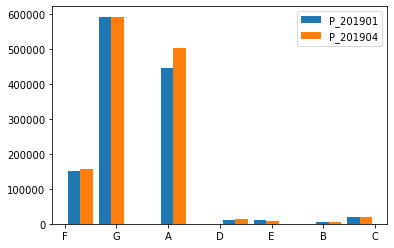

In [23]:
plt.hist([data['P_201901']['Id_Producto'],data['P_201904']['Id_Producto']], label=['P_201901', 'P_201904'])
plt.legend(loc='upper right')
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Id_Producto', ylabel='count'>

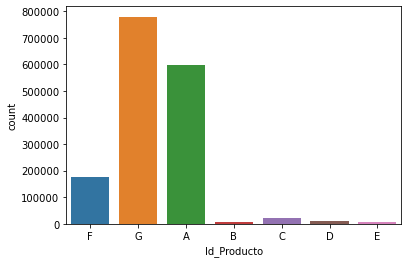

In [15]:
sns.countplot(data['P_201912']['Id_Producto'])

In [ ]:
sns.countplot(data['P_201912']['Id_Producto'])

In [ ]:
data = {}# HAY QUE PROBAR EL CHUNK
periodos=[201901, 201903, 201904, 201905, 201906, 201907, 201908, 201909,
       201910, 201911, 201912, 202001, 202003, 202004, 202005, 202006,
       202007, 201902, 202002]
for filename in periodos:
    data[f"P_{filename}"] = pd.read_csv('Datos/raw/transaction_subset/'+f"P_{filename}"+'.csv')
    
data.keys()

In [ ]:
primer_quan, cuar_quan = df_Periodo201912.Monto.quantile([.25, .75])

hist_monto=df.loc[(df_Periodo201912.Monto > primer_quan) & (df_Periodo201912.Monto < cuar_quan)]

In [ ]:
sns.histplot(df_Periodo202004['Monto'])#, color='blue', bins=1000

In [ ]:
sns.catplot(x="Signo", y="Monto", hue="Id_Producto", kind="swarm", data=df)

In [ ]:
df_1 = df[df['Periodo']==201901]

In [ ]:
df_1.head()

In [ ]:
count = df_1.groupby('Id_Producto')['Id_Producto'].count()
print(count)

In [ ]:
count/count.sum()

In [ ]:
df_1.describe()